# IA318 - Reinforcement Learning

# Dynamic programming

This notebook presents techniques of dynamic programming (**policy iteration, value iteration**) for the Walk.

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import sparse

In [5]:
from model import Walk, Agent

In [6]:
cmap = 'Wistia'

## Bellman's equation

The value of a policy is the unique solution $V$ to Bellman's equation:
$$
V = P(R + \gamma V)
$$
where $P$ is the transition matrix, $R$ is the reward vector and $\gamma$ the discount factor.

In [18]:
# transition matrix in sparse format
def get_transition_matrix(policy):
    n = Walk.Length
    row = []
    col = []
    data = []
    for state in range(n):
        for prob, action in zip(*policy(state)):
            probs, states = Walk.get_transition(state, action)
            row += len(states) * [state]
            col += list(states)
            data += list(prob * np.array(probs))
    transition = sparse.csr_matrix((data, (row, col)), shape=(n, n))
    return transition

In [19]:
def get_rewards():
    n = Walk.Length
    rewards = [Walk.get_reward(state) for state in range(n)]
    return np.array(rewards)

## Policy evaluation

In [20]:
def evaluate(policy, gamma=0.9, n_iter=100): 
    n = Walk.Length
    values = np.zeros(n)
    transition = get_transition_matrix(policy)
    rewards = get_rewards()
    for t in range(n_iter):
        values = transition.dot(rewards + gamma * values)
    return values

In [21]:
# first policy (here random)
policy = Agent(Walk()).policy

In [22]:
values = evaluate(policy)

In [23]:
values

array([3.53627941, 2.81809481, 2.72617966, 2.12898424, 2.00492262,
       2.32641249, 3.16490916, 4.70673207, 5.07229953, 6.56505773])

In [24]:
def display_values(values):
    plt.imshow(values.reshape(1,-1), cmap=cmap)
    plt.axis('off')
    plt.show()

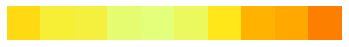

In [25]:
display_values(values)

In [26]:
def display_targets():
    n = Walk.Length
    rewards = np.zeros(n)
    rewards[Walk.Reward_States] = Walk.Reward_Values
    image = plt.imshow(rewards.reshape(1,-1), cmap=cmap)    
    plt.axis('off')
    plt.show()

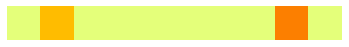

In [27]:
display_targets()

## Policy improvement

In [28]:
def improve_policy(values):
    n = Walk.Length
    best_actions = []
    for state in range(n):
        actions = Walk.get_actions(state)
        rewards = []
        for action in actions:
            probs, states = Walk.get_transition(state, action)
            rewards.append(np.sum(np.array(probs) * values[states]))
        best_actions.append(actions[np.argmax(rewards)])
    # policy(state) -> probs, actions
    policy = lambda state: [[1], [best_actions[state]]]
    return policy

In [29]:
def get_action(policy, state):
    probs, actions = policy(state)
    return actions[0]

In [30]:
policy = improve_policy(values)

In [31]:
def display_policy(policy):
    n = Walk.Length
    rewards = np.zeros(n)
    rewards[Walk.Reward_States] = Walk.Reward_Values
    plt.imshow(rewards.reshape(1,-1), cmap=cmap)   
    marker_sign = {1: '>', -1:'<'}
    for action, marker in marker_sign.items():
        x = [state for state in range(n) if get_action(policy, state) == action]
        if len(x):
            y = np.zeros_like(x)
            plt.scatter(x, y, marker=marker, s=200, c='grey')
    plt.axis('off')
    plt.show()

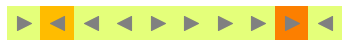

In [32]:
display_policy(policy)

## To do

Try a few steps of policy improvements and observe the result.

## Policy iteration

In [34]:
def policy_iteration(gamma=0.9, n_iter=100, verbose=True):
    n = Walk.Length
    agent = Agent(Walk())
    policy = agent.policy
    change = True
    t = 0
    while change:
        t += 1
        # policy evaluation
        values = evaluate(policy, gamma, n_iter)
        # policy improvement
        policy_ = improve_policy(values)
        change = bool(np.sum([np.abs(get_action(policy_, state) - get_action(policy, state)) for state in range(n)]))
        policy = policy_
    if verbose:
        print(t)
    return policy

## To do

* Display the optimal policy obtained by policy iteration.
* Observe the impact of the number of iterations.
* What happens when this number is equal to 1?
* Propose and test an algorithm for value iteration.

In [36]:
policy_iteration()

3


<function __main__.improve_policy.<locals>.<lambda>(state)>

In [44]:
for k in [10, 50,70,90,300]:
    print(policy_iteration(n_iter = k))

3
<function improve_policy.<locals>.<lambda> at 0x000002FDFEE4A9D8>
3
<function improve_policy.<locals>.<lambda> at 0x000002FDFEE4A9D8>
3
<function improve_policy.<locals>.<lambda> at 0x000002FDFEE4A9D8>
3
<function improve_policy.<locals>.<lambda> at 0x000002FDFEE4A9D8>
3
<function improve_policy.<locals>.<lambda> at 0x000002FDFEE4A9D8>
